# inisialisasi

In [0]:
# from google.colab import drive
# drive.mount('/content/drive')

In [0]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import*
import matplotlib.pyplot as plt
from matplotlib.cm import register_cmap
from scipy import stats
# from sklearn.decomposition import PCA as sklearnPCA
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

from scipy.stats import zscore

# from sklearn.decomposition import PCA as sklearnPCA
# from sklearn.preprocessing import StandardScaler

# from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
import time

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import cross_validate, ShuffleSplit

from sklearn.model_selection import KFold

from sklearn.neural_network import MLPClassifier

In [0]:
# url = 'https://raw.githubusercontent.com/hasobi/skripsi/dev/dataset/gabungan_train_test-original.csv'
# url = ''
# dataframe = pd.read_csv('/content/drive/My Drive/Tugas Akhir a.k.a SKRIPSI/SIAP SIDANG/KDDTrain_Test.csv')
dataframe =  pd.read_csv('https://raw.githubusercontent.com/hasobi/skripsi/dev/dataset/KDDTrain_Test.csv')
# data = pd.read_csv('/content/drive/My Drive/Tugas Akhir a.k.a SKRIPSI/SIAP SIDANG/KDDTrain_Test.csv')
data = pd.read_csv('https://raw.githubusercontent.com/hasobi/skripsi/dev/dataset/KDDTrain_Test.csv')

In [0]:
# dicitionary untuk merubah tipe serangan menjadi lebih umum seperti Normal, DoS, Probe, U2R, dan R2L

attack_dict={ #DOS
    'back' : 'dos',
    'land' : 'dos',
    'neptune' : 'dos',
    'pod' : 'dos',
    'smurf' : 'dos',
    'teardrop' : 'dos',
    'apache2' : 'dos',
    'udpstorm' : 'dos',
    'processtable' : 'dos',
    'worm' : 'dos',
    'mailbomb' : 'dos',
    
    #probe
    'satan' : 'probe',
    'ipsweep' : 'probe',
    'nmap' : 'probe',
    'portsweep' : 'probe',
    'mscan' : 'probe',
    'saint' : 'probe',
    
    #R2L
    'guess_passwd' : 'r2l',
    'ftp_write' : 'r2l',
    'imap' : 'r2l',
    'phf' : 'r2l',
    'multihop' : 'r2l',
    'warezmaster' : 'r2l',
    'warezclient' : 'r2l',
    'spy' : 'r2l',
    'xlock' : 'r2l',
    'xsnoop': 'r2l',
    'snmpguess' : 'r2l',
    'snmpgetattack' : 'r2l',
    'httptunnel' : 'r2l',
    'sendmail' : 'r2l',
    'named' : 'r2l',
    
    #U2R
    'buffer_overflow' : 'u2r',
    'loadmodule' : 'u2r',
    'rootkit' : 'u2r',
    'perl' : 'u2r',
    'sqlattack' : 'u2r',
    'xterm' : 'u2r',
    'ps' : 'u2r'
}

protocol_dict ={
    "udp" : 0,
    "tcp" : 1,
    "icmp": 2
}

service_dict={
    "Z39_50" : 0,
    "X11" : 1,
    "whois" : 2,
    "vmnet" : 3,
    "uucp_path" : 4,
    "uucp" : 5,
    "urp_i" : 6,
    "urh_i" : 7,
    "time" : 8,
    "tim_i" : 9,
    "tftp_u" : 10,
    "telnet" : 11,
    "systat" : 12,
    "supdup" : 13,
    "sunrpc" : 14,
    "ssh" : 15,
    "sql_net" : 16,
    "smtp" : 17,
    "shell" : 18,
    "rje" : 19,
    "remote_job" : 20,
    "red_i" : 21,
    "private" : 22,
    "printer" : 23,
    "pop_3" : 24,
    "pop_2" : 25,
    "pm_dump" : 26,
    "other" : 27,
    "ntp_u" : 28,
    "nntp" : 29,
    "nnsp" : 30,
    "netstat" : 31,
    "netbios_ssn" : 32,
    "netbios_ns" : 33,
    "netbios_dgm" : 34,
    "name" : 35,
    "mtp" : 36,
    "login" : 37,
    "link" : 38,
    "ldap" : 39,
    "kshell" : 40,
    "klogin" : 41,
    "iso_tsap" : 42,
    "IRC" : 43,
    "imap4" : 44,
    "http_8001" : 45,
    "http_443" : 46,
    "http_2784" : 47,
    "http" : 48,
    "hostnames" : 49,
    "harvest" : 50,
    "gopher" : 51,
    "ftp_data" : 52,
    "ftp" : 53,
    "finger" :  54,
    "exec" : 55,
    "efs" : 56,
    "ecr_i" : 57,
    "eco_i" : 58,
    "echo" : 59,
    "domain_u" : 60,
    "domain" : 61,
    "discard" : 62,
    "daytime" : 63,
    "ctf" : 64,
    "csnet_ns" : 65,
    "courier" : 66,
    "bgp" : 67,
    "auth" : 68,
    "aol" : 69

}

flag_dict={
    "SH" : 0,
    "SF" : 1,
    "S3" : 2,
    "S2" : 3,
    "S1" : 4,
    "S0" : 5,
    "RSTR" : 6,
    "RSTOS0" : 7,
    "RSTO" : 8,
    "REJ" : 9,
    "OTH" : 10

}
data.replace(flag_dict, inplace = True)
data.replace(service_dict, inplace = True)
data.replace(protocol_dict, inplace = True)
data.replace(attack_dict, inplace = True)

In [0]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,num_packet,type_attack
0,0,1,52,1,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20,normal
1,0,0,27,1,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15,normal
2,0,1,22,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19,dos
3,0,1,48,1,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21,normal
4,0,1,48,1,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21,normal


In [0]:
data.shape

(148516, 43)

In [0]:
# url = 'https://raw.githubusercontent.com/hasobi/skripsi/dev/dataset/KDDTrain_Test.csv'
# dataframe1 = pd.read_csv(url)

In [0]:
# dataframe1

# PCAv2 - 41 fitur

In [0]:
data.type_attack.unique()

array(['normal', 'dos', 'r2l', 'probe', 'u2r'], dtype=object)

In [0]:
data_all1 = data.drop(columns=['num_packet','type_attack'])

In [0]:
data_all1.shape

(148516, 41)

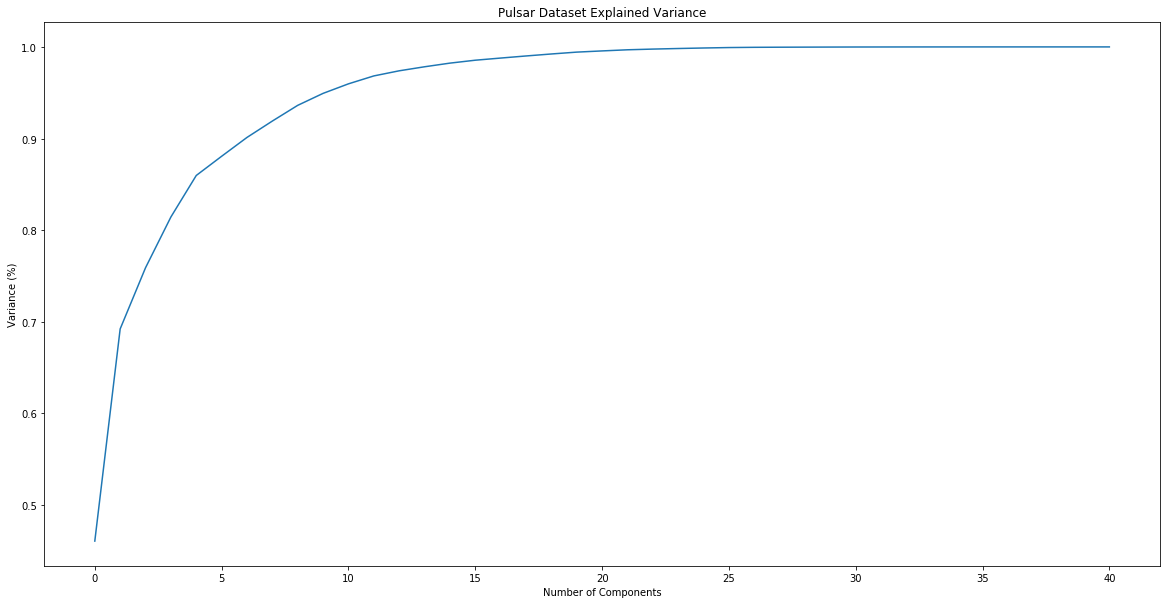

In [0]:
## MULAI PCA

scaler = MinMaxScaler(feature_range=[0, 1])
data_rescaled = scaler.fit_transform(data_all1.iloc[:,:])

#Fitting the PCA algorithm with our Data
pca = PCA().fit(data_rescaled)
#Plotting the Cumulative Summation of the Explained Variance
# plt.figure()
plt.figure(figsize=(20,10)) 

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

In [0]:
pca = PCA(n_components=41)
dataset = pca.fit_transform(data_rescaled)

In [0]:
dataset.shape

(148516, 41)

In [0]:
df3v1=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df3v1.head()

,column 0,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17,column 18,column 19,column 20,column 21,column 22,column 23,column 24,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34,column 35,column 36,column 37,column 38,column 39,column 40
0,-0.210454,0.109517,0.558613,-0.210847,0.410863,-0.182544,-0.269973,-0.061005,-0.463782,-0.041845,-0.016257,0.219600,0.057659,-0.134752,-0.017798,0.076811,-0.002909,-0.089396,-0.032376,0.006620,0.081705,-0.051989,-0.001722,-0.003106,-0.015040,-0.018264,-0.001643,-0.000989,-0.000149,-0.006964,-0.004533,-0.000210,-0.000157,-5.451047e-07,-0.000445,0.000052,-0.000139,-4.760363e-05,0.000003,-0.000011,-9.558075e-18
1,0.295173,0.354357,0.747835,-0.551986,0.892921,-0.064741,0.035088,0.275928,0.288845,0.207347,-0.411123,-0.394146,0.136762,-0.166930,0.005222,-0.232558,0.092964,-0.091796,-0.014189,0.026604,-0.183462,0.084000,0.043852,-0.001883,0.038448,-0.001640,0.005272,0.002423,0.003426,0.001434,0.002474,-0.000742,-0.000084,-4.248704e-04,0.000462,0.000704,0.000158,-4.170726e-05,0.000036,-0.000007,1.162525e-17
2,1.730388,-0.587896,-0.089366,0.074590,-0.067424,0.029835,-0.051773,-0.014232,0.111595,-0.045301,-0.100270,0.022367,0.014328,0.002643,0.023151,-0.013676,-0.007915,-0.002653,0.009050,0.000282,-0.049915,0.021489,0.005059,0.000722,0.001802,0.003486,0.001287,-0.000146,-0.000418,-0.000488,-0.000203,0.000069,-0.000072,5.659334e-06,0.000053,-0.000078,0.000012,-3.587490e-07,0.000009,0.000003,4.430353e-17
3,-1.010287,-0.469081,-0.215443,0.414567,-0.202224,-0.275664,0.018488,0.132578,0.049882,0.011953,0.045059,0.015433,0.037350,-0.063787,0.047175,0.056267,0.133808,-0.015194,-0.013705,0.011873,-0.003863,-0.003856,-0.072162,-0.012212,0.017498,-0.007879,0.012113,0.000448,-0.000886,0.000483,-0.000328,0.000054,0.000162,-4.609370e-06,0.000486,0.000420,-0.000098,-6.105354e-05,-0.000010,-0.000002,-5.469062e-17
4,-0.999356,-0.337932,-0.496051,-0.226706,0.023366,0.139347,0.131672,-0.138722,0.036212,0.066413,-0.031553,0.017770,0.016677,0.040106,-0.049254,-0.015651,0.009156,0.005715,-0.002939,-0.002169,-0.002592,0.004965,0.010204,-0.001057,0.001141,0.003586,-0.002123,0.000204,0.000300,0.000462,-0.000583,-0.000145,-0.000953,2.989296e-05,-0.000055,-0.000002,0.000041,8.627449e-05,-0.000002,0.000007,-5.792824e-19


In [0]:
df3v1.shape

(148516, 41)

In [0]:
data_attack = data['type_attack']
data_attack.shape

(148516,)

In [0]:
data_all2 = pd.concat([df3v1, data_attack], axis=1)
data_all2.head()

,column 0,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17,column 18,column 19,column 20,column 21,column 22,column 23,column 24,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34,column 35,column 36,column 37,column 38,column 39,column 40,type_attack
0,-0.210454,0.109517,0.558613,-0.210847,0.410863,-0.182544,-0.269973,-0.061005,-0.463782,-0.041845,-0.016257,0.219600,0.057659,-0.134752,-0.017798,0.076811,-0.002909,-0.089396,-0.032376,0.006620,0.081705,-0.051989,-0.001722,-0.003106,-0.015040,-0.018264,-0.001643,-0.000989,-0.000149,-0.006964,-0.004533,-0.000210,-0.000157,-5.451047e-07,-0.000445,0.000052,-0.000139,-4.760363e-05,0.000003,-0.000011,-9.558075e-18,normal
1,0.295173,0.354357,0.747835,-0.551986,0.892921,-0.064741,0.035088,0.275928,0.288845,0.207347,-0.411123,-0.394146,0.136762,-0.166930,0.005222,-0.232558,0.092964,-0.091796,-0.014189,0.026604,-0.183462,0.084000,0.043852,-0.001883,0.038448,-0.001640,0.005272,0.002423,0.003426,0.001434,0.002474,-0.000742,-0.000084,-4.248704e-04,0.000462,0.000704,0.000158,-4.170726e-05,0.000036,-0.000007,1.162525e-17,normal
2,1.730388,-0.587896,-0.089366,0.074590,-0.067424,0.029835,-0.051773,-0.014232,0.111595,-0.045301,-0.100270,0.022367,0.014328,0.002643,0.023151,-0.013676,-0.007915,-0.002653,0.009050,0.000282,-0.049915,0.021489,0.005059,0.000722,0.001802,0.003486,0.001287,-0.000146,-0.000418,-0.000488,-0.000203,0.000069,-0.000072,5.659334e-06,0.000053,-0.000078,0.000012,-3.587490e-07,0.000009,0.000003,4.430353e-17,dos
3,-1.010287,-0.469081,-0.215443,0.414567,-0.202224,-0.275664,0.018488,0.132578,0.049882,0.011953,0.045059,0.015433,0.037350,-0.063787,0.047175,0.056267,0.133808,-0.015194,-0.013705,0.011873,-0.003863,-0.003856,-0.072162,-0.012212,0.017498,-0.007879,0.012113,0.000448,-0.000886,0.000483,-0.000328,0.000054,0.000162,-4.609370e-06,0.000486,0.000420,-0.000098,-6.105354e-05,-0.000010,-0.000002,-5.469062e-17,normal
4,-0.999356,-0.337932,-0.496051,-0.226706,0.023366,0.139347,0.131672,-0.138722,0.036212,0.066413,-0.031553,0.017770,0.016677,0.040106,-0.049254,-0.015651,0.009156,0.005715,-0.002939,-0.002169,-0.002592,0.004965,0.010204,-0.001057,0.001141,0.003586,-0.002123,0.000204,0.000300,0.000462,-0.000583,-0.000145,-0.000953,2.989296e-05,-0.000055,-0.000002,0.000041,8.627449e-05,-0.000002,0.000007,-5.792824e-19,normal


In [0]:
data_all2.type_attack.unique()

array(['normal', 'dos', 'r2l', 'probe', 'u2r'], dtype=object)

In [0]:
data_normaldos = data_all2.loc[data_all2['type_attack'].isin(['normal','dos'])]

In [0]:
data_normaldos

,column 0,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17,column 18,column 19,column 20,column 21,column 22,column 23,column 24,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34,column 35,column 36,column 37,column 38,column 39,column 40,type_attack
0,-0.210454,0.109517,0.558613,-0.210847,0.410863,-0.182544,-0.269973,-0.061005,-0.463782,-0.041845,-0.016257,0.219600,0.057659,-0.134752,-0.017798,0.076811,-0.002909,-0.089396,-0.032376,0.006620,0.081705,-0.051989,-0.001722,-0.003106,-0.015040,-0.018264,-0.001643,-0.000989,-0.000149,-0.006964,-0.004533,-0.000210,-0.000157,-5.451047e-07,-0.000445,0.000052,-0.000139,-4.760363e-05,0.000003,-0.000011,-9.558075e-18,normal
1,0.295173,0.354357,0.747835,-0.551986,0.892921,-0.064741,0.035088,0.275928,0.288845,0.207347,-0.411123,-0.394146,0.136762,-0.166930,0.005222,-0.232558,0.092964,-0.091796,-0.014189,0.026604,-0.183462,0.084000,0.043852,-0.001883,0.038448,-0.001640,0.005272,0.002423,0.003426,0.001434,0.002474,-0.000742,-0.000084,-4.248704e-04,0.000462,0.000704,0.000158,-4.170726e-05,0.000036,-0.000007,1.162525e-17,normal
2,1.730388,-0.587896,-0.089366,0.074590,-0.067424,0.029835,-0.051773,-0.014232,0.111595,-0.045301,-0.100270,0.022367,0.014328,0.002643,0.023151,-0.013676,-0.007915,-0.002653,0.009050,0.000282,-0.049915,0.021489,0.005059,0.000722,0.001802,0.003486,0.001287,-0.000146,-0.000418,-0.000488,-0.000203,0.000069,-0.000072,5.659334e-06,0.000053,-0.000078,0.000012,-3.587490e-07,0.000009,0.000003,4.430353e-17,dos
3,-1.010287,-0.469081,-0.215443,0.414567,-0.202224,-0.275664,0.018488,0.132578,0.049882,0.011953,0.045059,0.015433,0.037350,-0.063787,0.047175,0.056267,0.133808,-0.015194,-0.013705,0.011873,-0.003863,-0.003856,-0.072162,-0.012212,0.017498,-0.007879,0.012113,0.000448,-0.000886,0.000483,-0.000328,0.000054,0.000162,-4.609370e-06,0.000486,0.000420,-0.000098,-6.105354e-05,-0.000010,-0.000002,-5.469062e-17,normal
4,-0.999356,-0.337932,-0.496051,-0.226706,0.023366,0.139347,0.131672,-0.138722,0.036212,0.066413,-0.031553,0.017770,0.016677,0.040106,-0.049254,-0.015651,0.009156,0.005715,-0.002939,-0.002169,-0.002592,0.004965,0.010204,-0.001057,0.001141,0.003586,-0.002123,0.000204,0.000300,0.000462,-0.000583,-0.000145,-0.000953,2.989296e-05,-0.000055,-0.000002,0.000041,8.627449e-05,-0.000002,0.000007,-5.792824e-19,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148510,-0.745114,-0.121176,0.638118,-0.628706,-0.408084,0.096112,0.518219,-0.422750,0.203252,0.078130,-0.336635,0.288477,0.142605,-0.110936,0.124525,-0.009756,-0.025701,-0.099058,-0.118726,-0.072920,0.063698,-0.036403,0.031837,0.006437,0.008970,-0.018430,-0.002888,0.001997,0.000816,-0.007001,-0.003137,0.000367,-0.000045,4.486348e-04,0.000576,0.000849,0.000225,1.465744e-04,-0.000046,-0.000002,-2.871573e-20,dos
148511,-0.828475,-0.226192,-0.170238,0.320094,0.390840,-0.140440,-0.092445,0.016003,0.132751,-0.274037,0.017808,0.076274,-0.019840,0.029050,-0.046854,-0.007740,0.002475,-0.028750,-0.003083,0.004940,-0.004040,-0.006299,0.005721,-0.010642,-0.000314,0.000212,-0.000513,-0.000696,-0.000264,-0.002796,-0.003126,-0.000364,-0.000913,-2.476098e-04,-0.000432,-0.000363,-0.000053,-7.250437e-05,0.000015,0.000005,-9.667916e-20,normal
148512,-1.049307,-0.351544,-0.396084,-0.037051,-0.019923,0.134743,0.058345,-0.062198,0.027576,0.074528,-0.027545,0.004143,0.027366,-0.000850,-0.024062,-0.017013,-0.002245,-0.000539,-0.006954,-0.009786,-0.005166,0.004367,0.005394,-0.001198,0.003874,0.004011,-0.000313,0.000200,0.000334,0.000344,-0.000387,-0.000128,-0.000864,2.449742e-05,0.000001,-0.000018,0.000019,6.562754e-05,0.000001,0.000005,-5.535031e-19,normal
148513,-1.005687,-0.286393,-0.491145,-0.172798,0.005716,0.231617,0.079806,-0.155350,0.040089,0.106986,-0.0385

In [0]:
X = data_normaldos.loc[:, :'column 40']
y = data_normaldos.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

In [0]:
print(f"training time : {stop - start}s")

training time : 28.24285316467285s


In [0]:
pred = clf.predict(X_test)

accuracy_score(y_test,pred)

0.998262291730553

In [0]:
clf = MLPClassifier(random_state = 5, max_iter=300)

scoring = {'accuracy': make_scorer(accuracy_score)}

In [0]:
# start = time.time()

# cv = ShuffleSplit(n_splits=3, test_size=0.3,train_size = 0.7, random_state=5)
# scores = cross_validate(clf, X, y, cv=cv, scoring=scoring, return_train_score=True)

# stop = time.time()

In [0]:
# print(f"Cross Validation time : {stop - start}s")

In [0]:
# print(scores)

# PCA 18

In [0]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,num_packet,type_attack
0,0,1,52,1,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20,normal
1,0,0,27,1,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15,normal
2,0,1,22,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19,dos
3,0,1,48,1,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21,normal
4,0,1,48,1,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21,normal


In [0]:
data.type_attack.unique()

array(['normal', 'dos', 'r2l', 'probe', 'u2r'], dtype=object)

In [0]:
data_all1 = data.drop(columns=['num_packet','type_attack'])

In [0]:
pca = PCA(n_components=18)
dataset = pca.fit_transform(data_rescaled)

df18=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df18.head()

,column 0,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,-0.210454,0.109517,0.558613,-0.210847,0.410863,-0.182544,-0.269973,-0.061005,-0.463782,-0.041845,-0.016257,0.219600,0.057659,-0.134752,-0.017798,0.076811,-0.002909,-0.089396
1,0.295173,0.354357,0.747835,-0.551986,0.892921,-0.064741,0.035088,0.275928,0.288845,0.207347,-0.411123,-0.394146,0.136762,-0.166930,0.005222,-0.232558,0.092964,-0.091796
2,1.730388,-0.587896,-0.089366,0.074590,-0.067424,0.029835,-0.051773,-0.014232,0.111595,-0.045301,-0.100270,0.022367,0.014328,0.002643,0.023151,-0.013676,-0.007915,-0.002653
3,-1.010287,-0.469081,-0.215443,0.414567,-0.202224,-0.275664,0.018488,0.132578,0.049882,0.011953,0.045059,0.015433,0.037350,-0.063787,0.047175,0.056267,0.133808,-0.015194
4,-0.999356,-0.337932,-0.496051,-0.226706,0.023366,0.139347,0.131672,-0.138722,0.036212,0.066413,-0.031553,0.017770,0.016677,0.040106,-0.049254,-0.015651,0.009156,0.005715


In [0]:
df18.shape

(148516, 18)

In [0]:
data_all2 = pd.concat([df18, data_attack], axis=1)
data_all2.head()

,column 0,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17,type_attack
0,-0.210454,0.109517,0.558613,-0.210847,0.410863,-0.182544,-0.269973,-0.061005,-0.463782,-0.041845,-0.016257,0.219600,0.057659,-0.134752,-0.017798,0.076811,-0.002909,-0.089396,normal
1,0.295173,0.354357,0.747835,-0.551986,0.892921,-0.064741,0.035088,0.275928,0.288845,0.207347,-0.411123,-0.394146,0.136762,-0.166930,0.005222,-0.232558,0.092964,-0.091796,normal
2,1.730388,-0.587896,-0.089366,0.074590,-0.067424,0.029835,-0.051773,-0.014232,0.111595,-0.045301,-0.100270,0.022367,0.014328,0.002643,0.023151,-0.013676,-0.007915,-0.002653,dos
3,-1.010287,-0.469081,-0.215443,0.414567,-0.202224,-0.275664,0.018488,0.132578,0.049882,0.011953,0.045059,0.015433,0.037350,-0.063787,0.047175,0.056267,0.133808,-0.015194,normal
4,-0.999356,-0.337932,-0.496051,-0.226706,0.023366,0.139347,0.131672,-0.138722,0.036212,0.066413,-0.031553,0.017770,0.016677,0.040106,-0.049254,-0.015651,0.009156,0.005715,normal


In [0]:
data_all2.type_attack.unique()

array(['normal', 'dos', 'r2l', 'probe', 'u2r'], dtype=object)

In [0]:
data_normaldos3 = data_all2.loc[data_all2['type_attack'].isin(['normal','dos'])]
data_normaldos3

,column 0,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17,type_attack
0,-0.210454,0.109517,0.558613,-0.210847,0.410863,-0.182544,-0.269973,-0.061005,-0.463782,-0.041845,-0.016257,0.219600,0.057659,-0.134752,-0.017798,0.076811,-0.002909,-0.089396,normal
1,0.295173,0.354357,0.747835,-0.551986,0.892921,-0.064741,0.035088,0.275928,0.288845,0.207347,-0.411123,-0.394146,0.136762,-0.166930,0.005222,-0.232558,0.092964,-0.091796,normal
2,1.730388,-0.587896,-0.089366,0.074590,-0.067424,0.029835,-0.051773,-0.014232,0.111595,-0.045301,-0.100270,0.022367,0.014328,0.002643,0.023151,-0.013676,-0.007915,-0.002653,dos
3,-1.010287,-0.469081,-0.215443,0.414567,-0.202224,-0.275664,0.018488,0.132578,0.049882,0.011953,0.045059,0.015433,0.037350,-0.063787,0.047175,0.056267,0.133808,-0.015194,normal
4,-0.999356,-0.337932,-0.496051,-0.226706,0.023366,0.139347,0.131672,-0.138722,0.036212,0.066413,-0.031553,0.017770,0.016677,0.040106,-0.049254,-0.015651,0.009156,0.005715,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148510,-0.745114,-0.121176,0.638118,-0.628706,-0.408084,0.096112,0.518219,-0.422750,0.203252,0.078130,-0.336635,0.288477,0.142605,-0.110936,0.124525,-0.009756,-0.025701,-0.099058,dos
148511,-0.828475,-0.226192,-0.170238,0.320094,0.390840,-0.140440,-0.092445,0.016003,0.132751,-0.274037,0.017808,0.076274,-0.019840,0.029050,-0.046854,-0.007740,0.002475,-0.028750,normal
148512,-1.049307,-0.351544,-0.396084,-0.037051,-0.019923,0.134743,0.058345,-0.062198,0.027576,0.074528,-0.027545,0.004143,0.027366,-0.000850,-0.024062,-0.017013,-0.002245,-0.000539,normal
148513,-1.005687,-0.286393,-0.491145,-0.172798,0.005716,0.231617,0.079806,-0.155350,0.040089,0.106986,-0.038570,-0.008078,0.062296,0.051919,-0.035847,0.015813,0.006642,-0.001734,dos


In [0]:
X = data_normaldos3.loc[:, :'column 17']
y = data_normaldos3.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

In [0]:
print(f"training time : {stop - start}s")

training time : 54.00039625167847s


In [0]:
pred = clf.predict(X_test)

accuracy_score(y_test,pred)

0.996524583461106

# 1 fitur

In [0]:
pca = PCA(n_components=1)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

,column 0
0,-0.210454
1,0.295173
2,1.730388
3,-1.010287
4,-0.999356


In [0]:
df

,column 0
0,-0.210454
1,0.295173
2,1.730388
3,-1.010287
4,-0.999356
...,...
148511,-0.828475
148512,-1.049307
148513,-1.005687
148514,-0.721211


In [0]:
df.shape

(148516, 1)

In [0]:
data_all2 = pd.concat([df, data_attack], axis=1)

In [0]:
data_normaldos = data_all2.loc[data_all2['type_attack'].isin(['normal','dos'])]

In [0]:
data_normaldos

,column 0,type_attack
0,-0.210454,normal
1,0.295173,normal
2,1.730388,dos
3,-1.010287,normal
4,-0.999356,normal
...,...,...
148510,-0.745114,dos
148511,-0.828475,normal
148512,-1.049307,normal
148513,-1.005687,dos


In [0]:
X = data_normaldos.loc[:, :'column 0']
y = data_normaldos.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

In [0]:
print(f"training time : {stop - start}s")

training time : 38.95454382896423s


In [0]:
pred = clf.predict(X_test)

accuracy_score(y_test,pred)

0.9432689359092303

# 2

In [0]:
pca = PCA(n_components=2)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

,column 0,column 1
0,-0.210454,0.109517
1,0.295173,0.354357
2,1.730388,-0.587896
3,-1.010287,-0.469081
4,-0.999356,-0.337932


In [0]:
data_all2 = pd.concat([df, data_attack], axis=1)

In [0]:
data_normaldos = data_all2.loc[data_all2['type_attack'].isin(['normal','dos'])]
data_normaldos

,column 0,column 1,type_attack
0,-0.210454,0.109517,normal
1,0.295173,0.354357,normal
2,1.730388,-0.587896,dos
3,-1.010287,-0.469081,normal
4,-0.999356,-0.337932,normal
...,...,...,...
148510,-0.745114,-0.121176,dos
148511,-0.828475,-0.226192,normal
148512,-1.049307,-0.351544,normal
148513,-1.005687,-0.286393,dos


In [0]:
X = data_normaldos.loc[:, :'column 1']
y = data_normaldos.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [0]:
print(f"training time : {stop - start}s")

training time : 100.91574788093567s


In [0]:
pred = clf.predict(X_test)

accuracy_score(y_test,pred)

0.9541040580598998

# 3

In [0]:
pca = PCA(n_components=3)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

,column 0,column 1,column 2
0,-0.210454,0.109517,0.558613
1,0.295173,0.354357,0.747835
2,1.730388,-0.587896,-0.089366
3,-1.010287,-0.469081,-0.215443
4,-0.999356,-0.337932,-0.496051


In [0]:
data_all2 = pd.concat([df, data_attack], axis=1)

In [0]:
data_normaldos = data_all2.loc[data_all2['type_attack'].isin(['normal','dos'])]
data_normaldos

,column 0,column 1,column 2,type_attack
0,-0.210454,0.109517,0.558613,normal
1,0.295173,0.354357,0.747835,normal
2,1.730388,-0.587896,-0.089366,dos
3,-1.010287,-0.469081,-0.215443,normal
4,-0.999356,-0.337932,-0.496051,normal
...,...,...,...,...
148510,-0.745114,-0.121176,0.638118,dos
148511,-0.828475,-0.226192,-0.170238,normal
148512,-1.049307,-0.351544,-0.396084,normal
148513,-1.005687,-0.286393,-0.491145,dos


In [0]:
X = data_normaldos.loc[:, :'column 2']
y = data_normaldos.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [0]:
print(f"training time : {stop - start}s")

training time : 86.58608603477478s


In [0]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.9706633956863948

# 4

In [0]:
pca = PCA(n_components=4)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

,column 0,column 1,column 2,column 3
0,-0.210454,0.109517,0.558613,-0.210847
1,0.295173,0.354357,0.747835,-0.551986
2,1.730388,-0.587896,-0.089366,0.074590
3,-1.010287,-0.469081,-0.215443,0.414567
4,-0.999356,-0.337932,-0.496051,-0.226706


In [0]:
data_all2 = pd.concat([df, data_attack], axis=1)
data_normaldos = data_all2.loc[data_all2['type_attack'].isin(['normal','dos'])]
data_normaldos

,column 0,column 1,column 2,column 3,type_attack
0,-0.210454,0.109517,0.558613,-0.210847,normal
1,0.295173,0.354357,0.747835,-0.551986,normal
2,1.730388,-0.587896,-0.089366,0.074590,dos
3,-1.010287,-0.469081,-0.215443,0.414567,normal
4,-0.999356,-0.337932,-0.496051,-0.226706,normal
...,...,...,...,...,...
148510,-0.745114,-0.121176,0.638118,-0.628706,dos
148511,-0.828475,-0.226192,-0.170238,0.320094,normal
148512,-1.049307,-0.351544,-0.396084,-0.037051,normal
148513,-1.005687,-0.286393,-0.491145,-0.172798,dos


In [0]:
X = data_normaldos.loc[:, :'column 3']
y = data_normaldos.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [0]:
print(f"training time : {stop - start}s")

training time : 105.61799383163452s


In [0]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.9851017070428294

# 5 fitur

In [0]:
pca = PCA(n_components=5)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

,column 0,column 1,column 2,column 3,column 4
0,-0.210454,0.109517,0.558614,-0.210849,0.410862
1,0.295173,0.354357,0.747837,-0.551988,0.892919
2,1.730388,-0.587896,-0.089367,0.074591,-0.067424
3,-1.010287,-0.469081,-0.215443,0.414566,-0.202226
4,-0.999356,-0.337932,-0.496051,-0.226706,0.023366


In [0]:
data_all2 = pd.concat([df, data_attack], axis=1)
data_normaldos = data_all2.loc[data_all2['type_attack'].isin(['normal','dos'])]
data_normaldos

,column 0,column 1,column 2,column 3,column 4,type_attack
0,-0.210454,0.109517,0.558614,-0.210849,0.410862,normal
1,0.295173,0.354357,0.747837,-0.551988,0.892919,normal
2,1.730388,-0.587896,-0.089367,0.074591,-0.067424,dos
3,-1.010287,-0.469081,-0.215443,0.414566,-0.202226,normal
4,-0.999356,-0.337932,-0.496051,-0.226706,0.023366,normal
...,...,...,...,...,...,...
148510,-0.745114,-0.121176,0.638118,-0.628705,-0.408085,dos
148511,-0.828475,-0.226192,-0.170238,0.320093,0.390839,normal
148512,-1.049307,-0.351544,-0.396084,-0.037051,-0.019923,normal
148513,-1.005687,-0.286393,-0.491145,-0.172798,0.005716,dos


In [0]:
X = data_normaldos.loc[:, :'column 4']
y = data_normaldos.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

In [0]:
print(f"training time : {stop - start}s")

training time : 96.72492408752441s


In [0]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.9873249514463865

# 6 Fitur

In [0]:
pca = PCA(n_components=6)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

,column 0,column 1,column 2,column 3,column 4,column 5
0,-0.210454,0.109517,0.558613,-0.210847,0.410863,-0.182549
1,0.295173,0.354357,0.747835,-0.551985,0.892920,-0.064750
2,1.730388,-0.587896,-0.089366,0.074590,-0.067424,0.029836
3,-1.010287,-0.469081,-0.215443,0.414568,-0.202225,-0.275686
4,-0.999356,-0.337932,-0.496051,-0.226706,0.023366,0.139347


In [0]:
data_all2 = pd.concat([df, data_attack], axis=1)
data_normaldos = data_all2.loc[data_all2['type_attack'].isin(['normal','dos'])]
data_normaldos

,column 0,column 1,column 2,column 3,column 4,column 5,type_attack
0,-0.210454,0.109517,0.558613,-0.210847,0.410863,-0.182549,normal
1,0.295173,0.354357,0.747835,-0.551985,0.892920,-0.064750,normal
2,1.730388,-0.587896,-0.089366,0.074590,-0.067424,0.029836,dos
3,-1.010287,-0.469081,-0.215443,0.414568,-0.202225,-0.275686,normal
4,-0.999356,-0.337932,-0.496051,-0.226706,0.023366,0.139347,normal
...,...,...,...,...,...,...,...
148510,-0.745114,-0.121176,0.638118,-0.628706,-0.408084,0.096107,dos
148511,-0.828475,-0.226192,-0.170238,0.320094,0.390840,-0.140440,normal
148512,-1.049307,-0.351544,-0.396084,-0.037051,-0.019923,0.134743,normal
148513,-1.005687,-0.286393,-0.491145,-0.172798,0.005716,0.231615,dos


In [0]:
X = data_normaldos.loc[:, :'column 5']
y = data_normaldos.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [0]:
print(f"training time : {stop - start}s")

training time : 104.37551379203796s


In [0]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.9892415414494531

# 7 fitur

In [0]:
pca = PCA(n_components=7)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

,column 0,column 1,column 2,column 3,column 4,column 5,column 6
0,-0.210454,0.109517,0.558613,-0.210847,0.410863,-0.182544,-0.269971
1,0.295173,0.354357,0.747835,-0.551986,0.892921,-0.064738,0.035101
2,1.730388,-0.587896,-0.089366,0.074590,-0.067424,0.029835,-0.051773
3,-1.010287,-0.469081,-0.215443,0.414567,-0.202224,-0.275666,0.018477
4,-0.999356,-0.337932,-0.496051,-0.226706,0.023366,0.139347,0.131671


In [0]:
data_all2 = pd.concat([df, data_attack], axis=1)
data_normaldos = data_all2.loc[data_all2['type_attack'].isin(['normal','dos'])]

X = data_normaldos.loc[:, :'column 6']
y = data_normaldos.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

In [0]:
print(f"training time : {stop - start}s")

training time : 91.82526659965515s


In [0]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.9921803127874885

# 8 fitur

In [0]:
pca = PCA(n_components=8)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

data_all2 = pd.concat([df, data_attack], axis=1)
data_normaldos = data_all2.loc[data_all2['type_attack'].isin(['normal','dos'])]

X = data_normaldos.loc[:, :'column 7']
y = data_normaldos.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

In [0]:
print(f"training time : {stop - start}s")

training time : 68.34772801399231s


In [0]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.9917458857201268

In [0]:
data_normaldos

,column 0,column 1,column 2,column 3,column 4,column 5,column 6,column 7,type_attack
0,-0.210454,0.109517,0.558613,-0.210847,0.410863,-0.182543,-0.269967,-0.061026,normal
1,0.295173,0.354357,0.747835,-0.551986,0.892921,-0.064743,0.035087,0.275939,normal
2,1.730388,-0.587896,-0.089366,0.074590,-0.067424,0.029833,-0.051776,-0.014221,dos
3,-1.010287,-0.469081,-0.215443,0.414568,-0.202223,-0.275652,0.018502,0.132530,normal
4,-0.999356,-0.337932,-0.496051,-0.226706,0.023366,0.139349,0.131674,-0.138730,normal
...,...,...,...,...,...,...,...,...,...
148510,-0.745114,-0.121176,0.638119,-0.628706,-0.408086,0.096085,0.518201,-0.422685,dos
148511,-0.828475,-0.226192,-0.170238,0.320094,0.390840,-0.140439,-0.092442,0.015996,normal
148512,-1.049307,-0.351544,-0.396084,-0.037051,-0.019923,0.134742,0.058346,-0.062198,normal
148513,-1.005687,-0.286393,-0.491145,-0.172798,0.005717,0.231627,0.079818,-0.155390,dos


# 9 Fitur

In [0]:
pca = PCA(n_components=9)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

data_all2 = pd.concat([df, data_attack], axis=1)
data_normaldos = data_all2.loc[data_all2['type_attack'].isin(['normal','dos'])]

X = data_normaldos.loc[:, :'column 8']
y = data_normaldos.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

In [0]:
print(f"training time : {stop - start}s")

training time : 66.97506785392761s


In [0]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.9934580394561995

# 10 Fitur

In [0]:
pca = PCA(n_components=10)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

data_all2 = pd.concat([df, data_attack], axis=1)
data_normaldos = data_all2.loc[data_all2['type_attack'].isin(['normal','dos'])]

X = data_normaldos.loc[:, :'column 9']
y = data_normaldos.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

In [0]:
print(f"training time : {stop - start}s")

training time : 66.63518857955933s


In [0]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.9941480118573035

# 11 Fitur

In [0]:
pca = PCA(n_components=11)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

data_all2 = pd.concat([df, data_attack], axis=1)
data_normaldos = data_all2.loc[data_all2['type_attack'].isin(['normal','dos'])]

X = data_normaldos.loc[:, :'column 10']
y = data_normaldos.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

In [0]:
print(f"training time : {stop - start}s")

training time : 56.08699321746826s


In [0]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.9944802207911684

# 12 Fitur

In [0]:
pca = PCA(n_components=12)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

data_all2 = pd.concat([df, data_attack], axis=1)
data_normaldos = data_all2.loc[data_all2['type_attack'].isin(['normal','dos'])]

X = data_normaldos.loc[:, :'column 11']
y = data_normaldos.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

In [0]:
print(f"training time : {stop - start}s")

training time : 59.71962118148804s


In [0]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.9948124297250333

# 13 Fitur

In [0]:
pca = PCA(n_components=13)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

data_all2 = pd.concat([df, data_attack], axis=1)
data_normaldos = data_all2.loc[data_all2['type_attack'].isin(['normal','dos'])]

X = data_normaldos.loc[:, :'column 12']
y = data_normaldos.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
data_normaldos

,column 0,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,type_attack
0,-0.210454,0.109517,0.558613,-0.210847,0.410863,-0.182544,-0.269973,-0.061005,-0.463782,-0.041845,-0.016257,0.219600,0.057662,normal
1,0.295173,0.354357,0.747835,-0.551986,0.892921,-0.064741,0.035088,0.275928,0.288845,0.207347,-0.411123,-0.394146,0.136758,normal
2,1.730388,-0.587896,-0.089366,0.074590,-0.067424,0.029835,-0.051773,-0.014232,0.111595,-0.045301,-0.100270,0.022367,0.014327,dos
3,-1.010287,-0.469081,-0.215443,0.414567,-0.202224,-0.275664,0.018488,0.132578,0.049882,0.011953,0.045059,0.015433,0.037358,normal
4,-0.999356,-0.337932,-0.496051,-0.226706,0.023366,0.139347,0.131672,-0.138722,0.036212,0.066413,-0.031553,0.017770,0.016676,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148510,-0.745114,-0.121176,0.638118,-0.628706,-0.408084,0.096112,0.518219,-0.422750,0.203252,0.078130,-0.336635,0.288476,0.142604,dos
148511,-0.828475,-0.226192,-0.170238,0.320094,0.390840,-0.140440,-0.092445,0.016003,0.132751,-0.274037,0.017808,0.076274,-0.019839,normal
148512,-1.049307,-0.351544,-0.396084,-0.037051,-0.019923,0.134743,0.058345,-0.062198,0.027576,0.074528,-0.027545,0.004143,0.027365,normal
148513,-1.005687,-0.286393,-0.491145,-0.172798,0.005716,0.231617,0.079806,-0.155350,0.040089,0.106986,-0.038570,-0.008078,0.062295,dos


In [0]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

In [0]:
print(f"training time : {stop - start}s")

training time : 57.73348879814148s


In [0]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.9957068383931309

# 14 Fitur

In [0]:
pca = PCA(n_components=14)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

data_all2 = pd.concat([df, data_attack], axis=1)
data_normaldos = data_all2.loc[data_all2['type_attack'].isin(['normal','dos'])]

X = data_normaldos.loc[:, :'column 13']
y = data_normaldos.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

In [0]:
print(f"training time : {stop - start}s")

training time : 49.595258474349976s


In [0]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.9963201471941122

# 15 Fitur

In [0]:
pca = PCA(n_components=15)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

data_all2 = pd.concat([df, data_attack], axis=1)
data_normaldos = data_all2.loc[data_all2['type_attack'].isin(['normal','dos'])]

X = data_normaldos.loc[:, :'column 14']
y = data_normaldos.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

In [0]:
print(f"training time : {stop - start}s")

training time : 58.5414719581604s


In [0]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.9959368291934989

# 16 Fitur

In [0]:
pca = PCA(n_components=16)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

data_all2 = pd.concat([df, data_attack], axis=1)
data_normaldos = data_all2.loc[data_all2['type_attack'].isin(['normal','dos'])]

X = data_normaldos.loc[:, :'column 15']
y = data_normaldos.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

In [0]:
print(f"training time : {stop - start}s")

training time : 66.54730677604675s


In [0]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.9956301747930083

# 17 Fitur

In [0]:
pca = PCA(n_components=17)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

data_all2 = pd.concat([df, data_attack], axis=1)
data_normaldos = data_all2.loc[data_all2['type_attack'].isin(['normal','dos'])]

X = data_normaldos.loc[:, :'column 16']
y = data_normaldos.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

In [0]:
print(f"training time : {stop - start}s")

training time : 63.220704317092896s


In [0]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.9964223653276091

# 19 Fitur

In [0]:
pca = PCA(n_components=19)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

data_all2 = pd.concat([df, data_attack], axis=1)
data_normaldos = data_all2.loc[data_all2['type_attack'].isin(['normal','dos'])]

X = data_normaldos.loc[:, :'column 18']
y = data_normaldos.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

In [0]:
print(f"training time : {stop - start}s")


training time : 62.333287954330444s


In [0]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.9966268015946029

# 20 Fitur

In [0]:
pca = PCA(n_components=20)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

data_all2 = pd.concat([df, data_attack], axis=1)
data_normaldos = data_all2.loc[data_all2['type_attack'].isin(['normal','dos'])]

X = data_normaldos.loc[:, :'column 19']
y = data_normaldos.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

In [0]:
print(f"training time : {stop - start}s")


training time : 40.759321212768555s


In [0]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.9964223653276091

# 21 Fitur

In [0]:
pca = PCA(n_components=21)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

data_all2 = pd.concat([df, data_attack], axis=1)
data_normaldos = data_all2.loc[data_all2['type_attack'].isin(['normal','dos'])]

X = data_normaldos.loc[:, :'column 20']
y = data_normaldos.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

In [0]:
print(f"training time : {stop - start}s")


training time : 51.108516693115234s


In [0]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.9970356741285904

# 22 Fitur

In [0]:
pca = PCA(n_components=22)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

data_all2 = pd.concat([df, data_attack], axis=1)
data_normaldos = data_all2.loc[data_all2['type_attack'].isin(['normal','dos'])]

X = data_normaldos.loc[:, :'column 21']
y = data_normaldos.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

In [0]:
print(f"training time : {stop - start}s")

training time : 58.5711555480957s


In [0]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.9971634467954615

# 23 Fitur

In [0]:
pca = PCA(n_components=23)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

data_all2 = pd.concat([df, data_attack], axis=1)
data_normaldos = data_all2.loc[data_all2['type_attack'].isin(['normal','dos'])]

X = data_normaldos.loc[:, :'column 22']
y = data_normaldos.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

In [0]:
print(f"training time : {stop - start}s")

training time : 50.7208194732666s


In [0]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.9969590105284678

# 24 Fitur

In [0]:
pca = PCA(n_components=24)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

data_all2 = pd.concat([df, data_attack], axis=1)
data_normaldos = data_all2.loc[data_all2['type_attack'].isin(['normal','dos'])]

X = data_normaldos.loc[:, :'column 23']
y = data_normaldos.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

In [0]:
print(f"training time : {stop - start}s")

training time : 56.631887674331665s


In [0]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.9971378922620873

# 25 Fitur

In [0]:
pca = PCA(n_components=25)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

data_all2 = pd.concat([df, data_attack], axis=1)
data_normaldos = data_all2.loc[data_all2['type_attack'].isin(['normal','dos'])]

X = data_normaldos.loc[:, :'column 24']
y = data_normaldos.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

In [0]:
print(f"training time : {stop - start}s")

training time : 53.78609037399292s


In [0]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.9969334559950935

# 26 Fitur

In [0]:
pca = PCA(n_components=26)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

data_all2 = pd.concat([df, data_attack], axis=1)
data_normaldos = data_all2.loc[data_all2['type_attack'].isin(['normal','dos'])]

X = data_normaldos.loc[:, :'column 25']
y = data_normaldos.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

In [0]:
print(f"training time : {stop - start}s")

training time : 43.833905935287476s


In [0]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.9965756925278545

# 27 Fitur

In [0]:
pca = PCA(n_components=27)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

data_all2 = pd.concat([df, data_attack], axis=1)
data_normaldos = data_all2.loc[data_all2['type_attack'].isin(['normal','dos'])]

X = data_normaldos.loc[:, :'column 26']
y = data_normaldos.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

In [0]:
print(f"training time : {stop - start}s")

training time : 50.628225326538086s


In [0]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.9970867831953388

# 28 Fitur

In [0]:
pca = PCA(n_components=28)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

data_all2 = pd.concat([df, data_attack], axis=1)
data_normaldos = data_all2.loc[data_all2['type_attack'].isin(['normal','dos'])]

X = data_normaldos.loc[:, :'column 27']
y = data_normaldos.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

In [0]:
print(f"training time : {stop - start}s")

training time : 62.24335980415344s


In [0]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.9974956557293264

# 29 Fitur

In [0]:
pca = PCA(n_components=29)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

data_all2 = pd.concat([df, data_attack], axis=1)
data_normaldos = data_all2.loc[data_all2['type_attack'].isin(['normal','dos'])]

X = data_normaldos.loc[:, :'column 28']
y = data_normaldos.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

In [0]:
print(f"training time : {stop - start}s")

training time : 68.7303466796875s


In [0]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.9978789737299397

# 30 Fitur

In [0]:
pca = PCA(n_components=30)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

data_all2 = pd.concat([df, data_attack], axis=1)
data_normaldos = data_all2.loc[data_all2['type_attack'].isin(['normal','dos'])]

X = data_normaldos.loc[:, :'column 29']
y = data_normaldos.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

In [0]:
print(f"training time : {stop - start}s")

training time : 53.4615204334259s


In [0]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.9986456097311663

# 31 Fitur

In [0]:
pca = PCA(n_components=31)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

data_all2 = pd.concat([df, data_attack], axis=1)
data_normaldos = data_all2.loc[data_all2['type_attack'].isin(['normal','dos'])]

X = data_normaldos.loc[:, :'column 30']
y = data_normaldos.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

In [0]:
print(f"training time : {stop - start}s")

training time : 31.831817626953125s


In [0]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.9980834099969335

# 32 Fitur

In [0]:
pca = PCA(n_components=32)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

data_all2 = pd.concat([df, data_attack], axis=1)
data_normaldos = data_all2.loc[data_all2['type_attack'].isin(['normal','dos'])]

X = data_normaldos.loc[:, :'column 31']
y = data_normaldos.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

In [0]:
print(f"training time : {stop - start}s")

training time : 35.04275846481323s


In [0]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.9983134007973015

# 33 Fitur

In [0]:
pca = PCA(n_components=33)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

data_all2 = pd.concat([df, data_attack], axis=1)
data_normaldos = data_all2.loc[data_all2['type_attack'].isin(['normal','dos'])]

X = data_normaldos.loc[:, :'column 32']
y = data_normaldos.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

In [0]:
print(f"training time : {stop - start}s")

training time : 38.754353046417236s


In [0]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.998492282530921

# 34 Fitur

In [0]:
pca = PCA(n_components=34)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

data_all2 = pd.concat([df, data_attack], axis=1)
data_normaldos = data_all2.loc[data_all2['type_attack'].isin(['normal','dos'])]

X = data_normaldos.loc[:, :'column 33']
y = data_normaldos.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

In [0]:
print(f"training time : {stop - start}s")

training time : 44.21654748916626s


In [0]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.9982878462639272

# 35 Fitur

In [0]:
pca = PCA(n_components=35)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

data_all2 = pd.concat([df, data_attack], axis=1)
data_normaldos = data_all2.loc[data_all2['type_attack'].isin(['normal','dos'])]

X = data_normaldos.loc[:, :'column 34']
y = data_normaldos.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

In [0]:
print(f"training time : {stop - start}s")

training time : 46.40112495422363s


In [0]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.9984667279975468

# 36 Fitur

In [0]:
pca = PCA(n_components=36)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

data_all2 = pd.concat([df, data_attack], axis=1)
data_normaldos = data_all2.loc[data_all2['type_attack'].isin(['normal','dos'])]

X = data_normaldos.loc[:, :'column 35']
y = data_normaldos.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

In [0]:
print(f"training time : {stop - start}s")

training time : 26.423269987106323s


In [0]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.9983134007973015

# 37 Fitur

In [0]:
pca = PCA(n_components=37)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

data_all2 = pd.concat([df, data_attack], axis=1)
data_normaldos = data_all2.loc[data_all2['type_attack'].isin(['normal','dos'])]

X = data_normaldos.loc[:, :'column 36']
y = data_normaldos.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

In [0]:
print(f"training time : {stop - start}s")

training time : 46.93728303909302s


In [0]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.9985433915976695

# 38 Fitur

In [0]:
pca = PCA(n_components=38)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

data_all2 = pd.concat([df, data_attack], axis=1)
data_normaldos = data_all2.loc[data_all2['type_attack'].isin(['normal','dos'])]

X = data_normaldos.loc[:, :'column 37']
y = data_normaldos.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

In [0]:
print(f"training time : {stop - start}s")

training time : 36.9508011341095s


In [0]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.9982111826638046

# 39 Fitur

In [0]:
pca = PCA(n_components=39)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

data_all2 = pd.concat([df, data_attack], axis=1)
data_normaldos = data_all2.loc[data_all2['type_attack'].isin(['normal','dos'])]

X = data_normaldos.loc[:, :'column 38']
y = data_normaldos.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

In [0]:
print(f"training time : {stop - start}s")

training time : 37.975849628448486s


In [0]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.9985433915976695

# 40 Fitur

In [0]:
pca = PCA(n_components=40)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

data_all2 = pd.concat([df, data_attack], axis=1)
data_normaldos = data_all2.loc[data_all2['type_attack'].isin(['normal','dos'])]

X = data_normaldos.loc[:, :'column 39']
y = data_normaldos.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

In [0]:
print(f"training time : {stop - start}s")

training time : 43.47029113769531s


In [0]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.9981600735970562

# CEK OVERFIT

In [0]:
start = time.time()

cv = ShuffleSplit(n_splits=3, test_size=0.3, train_size = 0.7, random_state=5)
scores = cross_validate(clf, X, y, cv=cv, scoring=scoring, return_train_score=True)

stop = time.time()

In [0]:
print(f"Cross Validation time : {stop - start}s")

Cross Validation time : 124.11892533302307s


In [0]:
print(scores)

{'fit_time': array([43.42600989, 44.22683239, 34.4327836 ]), 'score_time': array([0.21903634, 0.21851707, 0.21831203]), 'test_accuracy': array([0.99816007, 0.99867116, 0.99864561]), 'train_accuracy': array([0.99893766, 0.99916765, 0.99928812])}


In [0]:
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier

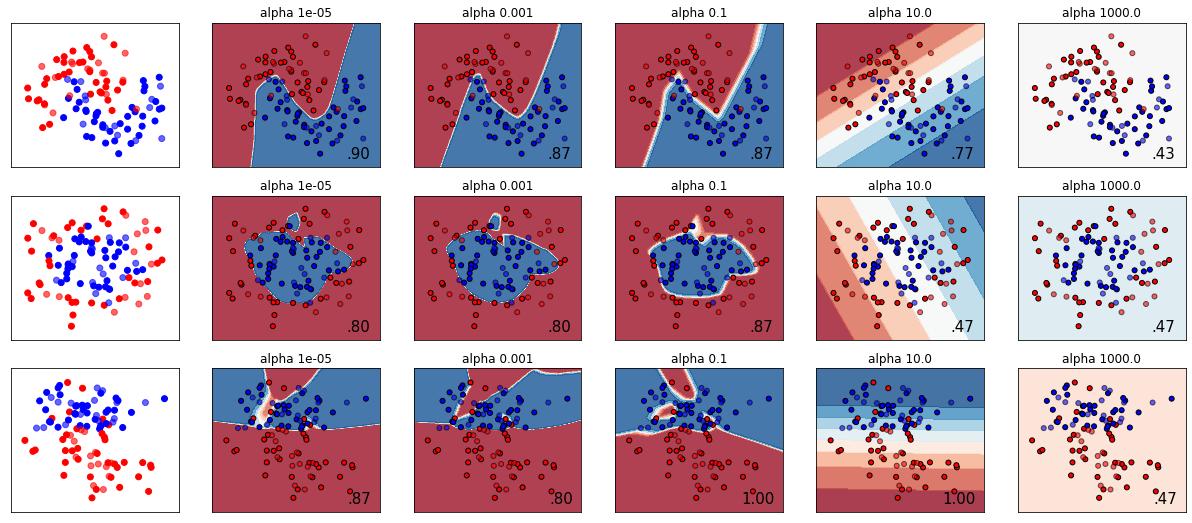

In [0]:
h = .02  # step size in the mesh

alphas = np.logspace(-5, 3, 5)
names = ['alpha ' + str(i) for i in alphas]

classifiers = []
for i in alphas:
    classifiers.append(MLPClassifier(solver='lbfgs', alpha=i, random_state=1,
                                     hidden_layer_sizes=[100, 100]))

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=0, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable]

figure = plt.figure(figsize=(17, 9))
i = 1
# iterate over datasets
for X, y in datasets:
    # preprocess dataset, split into training and test part
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, train_size=0.7, random_state=5)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='black', s=25)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6, edgecolors='black', s=25)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

figure.subplots_adjust(left=.02, right=.98)
plt.show()